In [6]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

import scipy.stats as stats
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import weibull_min
import scipy

from fitter import Fitter, get_common_distributions, get_distributions

In [7]:
os.getcwd()

'c:\\Users\\lukas\\OneDrive - Imperial College London\\0_Low Carbon Technologies\\wind_python'

In [8]:
dic = os.getcwd() + "/data/wind_data.xlsx"
wind_data = pd.read_excel(dic)
wind_data.dropna(inplace=True)
wind_data

,Day,Month,Year,Time (GMT/UTC),Wind - Mean Speed (knots),Wind - Mean Direction
0,1,1,2005,0,16.0,230.0
1,1,1,2005,1,17.0,230.0
2,1,1,2005,2,17.0,230.0
3,1,1,2005,3,18.0,230.0
4,1,1,2005,4,18.0,230.0
...,...,...,...,...,...,...
8755,31,12,2005,19,23.0,250.0
8756,31,12,2005,20,20.0,290.0
8757,31,12,2005,21,17.0,310.0
8758,31,12,2005,22,15.0,310.0


In [9]:
min_value = 0
max_value = 47
range_windspeed = list(range(min_value,max_value))
wind_speed = pd.DataFrame(range_windspeed)
wind_speed = wind_speed.rename(columns={0:"Wind Speed"})
wind_speed

for i in range(min_value,max_value):
    if i==41:
        wind_speed.loc[i,'Occ'] = 0
    else:
        wind_speed.loc[i,'Occ'] = wind_data['Wind - Mean Speed (knots)'].value_counts()[i] 

In [10]:
sum_values = wind_speed['Occ'].sum()

#wind_speed['Occ'] = wind_speed['Occ'] / sum_values
#wind_speed['Occ'].sum()
#wind_speed['Occ'] = wind_speed['Occ'].round(5)
wind_speed.drop(index=0,inplace=True)
wind_speed.reset_index(inplace=True)


In [11]:
# Change knots to m/s
# 1knot =  0.514444 m/s
conversion_rate = 0.514444
wind_data['Wind - Mean Speed (knots)'] = wind_data['Wind - Mean Speed (knots)'] * conversion_rate
wind_data

,Day,Month,Year,Time (GMT/UTC),Wind - Mean Speed (knots),Wind - Mean Direction
0,1,1,2005,0,8.231104,230.0
1,1,1,2005,1,8.745548,230.0
2,1,1,2005,2,8.745548,230.0
3,1,1,2005,3,9.259992,230.0
4,1,1,2005,4,9.259992,230.0
...,...,...,...,...,...,...
8755,31,12,2005,19,11.832212,250.0
8756,31,12,2005,20,10.288880,290.0
8757,31,12,2005,21,8.745548,310.0
8758,31,12,2005,22,7.716660,310.0


In [18]:
#wind_np = wind_speed[['Wind Speed','Occ']].to_numpy()
#wind_np = wind_data['Wind - Mean Speed (knots)'].to_numpy()

# drop zeros
df = wind_data.drop(wind_data[wind_data['Wind - Mean Speed (knots)'] == 0].index)

wind_np = df['Wind - Mean Speed (knots)'].to_numpy()

wind_np = wind_np.round(4)
wind_np

array([8.2311, 8.7455, 8.7455, ..., 8.7455, 7.7167, 8.2311])

In [13]:
np.median(wind_np)
np.average(wind_np)
np.max(wind_np)

23.6644

(array([366., 139., 150., 283., 343., 497., 423., 500., 437., 467., 396.,
        452., 328., 434., 322., 374., 292., 331., 269., 310., 241., 253.,
        208., 179., 108., 119., 106.,  80.,  62.,  55.,  39.,  34.,  26.,
         24.,  15.,  22.,  17.,  10.,   6.,   2.,   4.,   0.,   4.,   2.,
          2.,   2.]),
 array([ 0.      ,  0.514444,  1.028888,  1.543332,  2.057776,  2.57222 ,
         3.086664,  3.601108,  4.115552,  4.629996,  5.14444 ,  5.658884,
         6.173328,  6.687772,  7.202216,  7.71666 ,  8.231104,  8.745548,
         9.259992,  9.774436, 10.28888 , 10.803324, 11.317768, 11.832212,
        12.346656, 12.8611  , 13.375544, 13.889988, 14.404432, 14.918876,
        15.43332 , 15.947764, 16.462208, 16.976652, 17.491096, 18.00554 ,
        18.519984, 19.034428, 19.548872, 20.063316, 20.57776 , 21.092204,
        21.606648, 22.121092, 22.635536, 23.14998 , 23.664424]),
 <BarContainer object of 46 artists>)

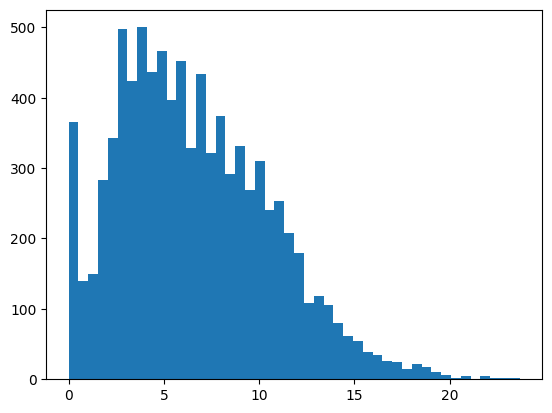

In [14]:
plt.figure()
#plt.bar(wind_speed['Wind Speed'],wind_speed['Occ'])
plt.hist(wind_data['Wind - Mean Speed (knots)'],46)
#plt.hist(wind_np,bins=46)

## Weibull distribution

In [15]:
list(range(22,360,45))

[22, 67, 112, 157, 202, 247, 292, 337]

In [230]:
# Eliminate 0
wind_data_zero = wind_data.drop(wind_data[wind_data['Wind - Mean Speed (knots)'] == 0].index)

# 1/8, bins=35
# df = wind_data_zero[((wind_data_zero['Wind - Mean Direction']<22.5))]
# df_2 = wind_data_zero[(wind_data_zero['Wind - Mean Direction'] > 337.5)]

# wind_np_1 = df['Wind - Mean Speed (knots)'].to_numpy()
# wind_np_2 = df_2['Wind - Mean Speed (knots)'].to_numpy()
# wind_np = np.append(wind_np_1,wind_np_2)

# 2/8, bins=24
# df = wind_data_zero[(wind_data['Wind - Mean Direction'] >22.5) & (wind_data['Wind - Mean Direction'] <=67.5)]
# wind_np = df['Wind - Mean Speed (knots)'].to_numpy()

# 3/8, bins=21 # 67.5 - 112.5
# df = wind_data_zero[(wind_data['Wind - Mean Direction'] >67.5) & (wind_data['Wind - Mean Direction'] <=112.5)]
# wind_np = df['Wind - Mean Speed (knots)'].to_numpy()

# 4/8, bins=20 # 112.5 - 157.5
# df = wind_data_zero[(wind_data['Wind - Mean Direction'] >112.5) & (wind_data['Wind - Mean Direction'] <=157.5)]
# wind_np = df['Wind - Mean Speed (knots)'].to_numpy()

# 5/8, bins= 20 # 157.5 - 202.5
# df = wind_data_zero[(wind_data['Wind - Mean Direction'] >157.5) & (wind_data['Wind - Mean Direction'] <=202.5)]
# wind_np = df['Wind - Mean Speed (knots)'].to_numpy()

# 6/8,bins=20 # 202.5 - 247.5
# df = wind_data_zero[(wind_data['Wind - Mean Direction'] >202.5) & (wind_data['Wind - Mean Direction'] <=247.5)]
# wind_np = df['Wind - Mean Speed (knots)'].to_numpy()
 
# 7/8,bins=42 # 247.5 - 292.5
# df = wind_data_zero[(wind_data['Wind - Mean Direction'] >247.5) & (wind_data['Wind - Mean Direction'] <=292.5)]
# wind_np = df['Wind - Mean Speed (knots)'].to_numpy()

# # 8/8, bins=30 # 
# df = wind_data_zero[(wind_data['Wind - Mean Direction'] >292.5) & (wind_data['Wind - Mean Direction'] <=337.5)]
# wind_np = df['Wind - Mean Speed (knots)'].to_numpy()

# plt.figure()
# plt.hist(df['Wind - Mean Speed (knots)'],bins=25)
np.unique(wind_np).size
np.size(wind_np)

8733

In [63]:
np.max(wind_np)

23.6644

,sumsquare_error,aic,bic,kl_div,ks_statistic,ks_pvalue
weibull_min,0.003042,382.724472,403.820624,inf,0.04127,8.062787e-13


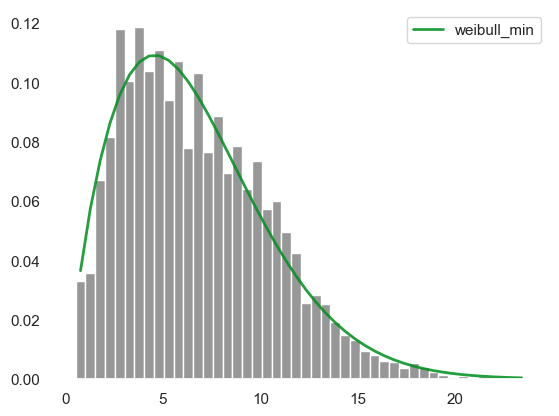

In [71]:
f = Fitter(wind_np, distributions=['weibull_min'],bins=46) # 
f.fit()
f.summary()

In [216]:
f.fitted_param['weibull_min'][2]

7.1942809719400955

In [201]:
def weib(x):
    return (1.7184829371902315 / 7.1942809719400955) * (x / 7.1942809719400955)**(1.7184829371902315 - 1) * np.exp(-(x / 7.1942809719400955)**1.7184829371902315)

max_x = scipy.optimize.fmin(lambda x: -weib(x), 0)
max_x

Optimization terminated successfully.
         Current function value: -0.109204
         Iterations: 29
         Function evaluations: 58


array([4.331125])

In [ ]:
def f(x): return -2 * x**2 + 4 * x
max_x = scipy.optimize.fmin(lambda x: -f(x), 0)

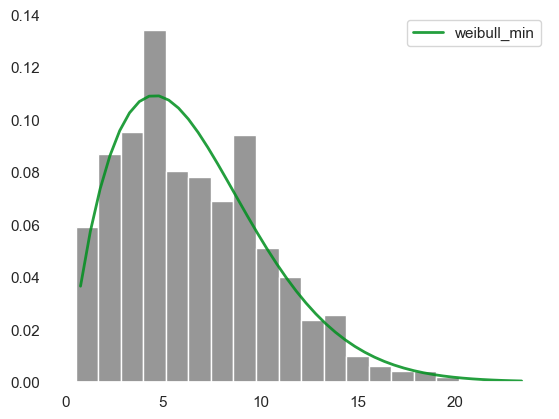

In [61]:
# Plotting the fitted distributions
wind_np_relative = wind_np / wind_np.sum()


plt.hist(wind_np,bins=20,density=True)
f.plot_pdf()
plt.show()

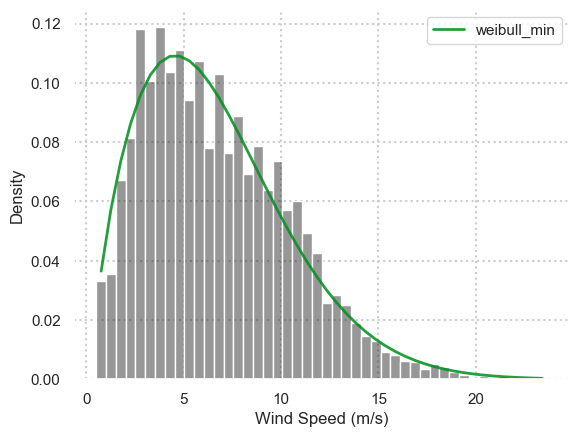

In [62]:
import seaborn as sns
from cycler import cycler

sns.set_theme()
sns.set_style(rc = {'axes.facecolor': 'w'})


plt.rc('lines', linewidth=1.5, linestyle='-')
plt.rcParams['axes.prop_cycle'] = cycler(color=['#20202077',
                                               '#029020dd',
                                               '#FF8C00dd',
                                               '#ff00ffcc',
                                               '#2020ffdd']
                                               # alpha=[1, 1, 1, 1, .7]
                                          )

f.summary(plot=True, lw=2)

plt.gca().set_axisbelow(True)
plt.gca().grid(color='#cccccccc', linestyle=':', 
              linewidth=1.5, which='both')
#plt.gca().plot(color='blue')
plt.xlabel('Wind Speed (m/s)')
plt.ylabel('Density')
plt.plot(color='blue')
#plt.show()
plt.savefig('%s/figures/fig_%i.png' % (os.getcwd(),1))

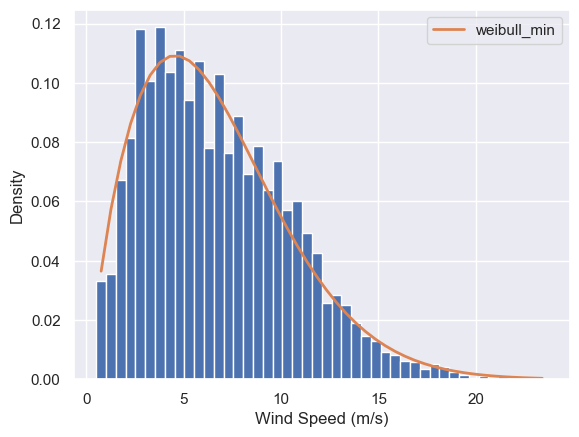

In [59]:
import seaborn as sns
from cycler import cycler


sns.set_theme()

f.summary(plot=True, lw=2)

plt.gca().set_axisbelow(True)
plt.xlabel('Wind Speed (m/s)')
plt.ylabel('Density')
plt.savefig('%s/figures/fig_%i.png' % (os.getcwd(),1))

In [36]:
print('%s/figures/fig_%i.jpg' % (os.getcwd(),1))

c:\Users\lukas\OneDrive - Imperial College London\0_Low Carbon Technologies\wind_python/figures/fig_1.jpg


In [14]:
f.fitted_param['weibull_min']

(1.7184829371902315, 0.23180476905293598, 7.1942809719400955)

In [15]:
## What are the differences in distribution functions? 

## Wind direction

In [173]:
np.size(wind_45)

10140

In [174]:
df1 = wind_data[(wind_data['Wind - Mean Direction'] <= 22.5)]
df2 = wind_data[(wind_data['Wind - Mean Direction'] > 337.5)]
frames = [df1,df2]
wind_45 = pd.concat(frames)

share_45 = wind_45['Wind - Mean Direction'].size / wind_data['Wind - Mean Direction'].size
print('Share of 0-45:',share_45)


wind_90 = wind_data[((wind_data['Wind - Mean Direction'] >22.25) & (wind_data['Wind - Mean Direction'] <=67.5))]
share_90 = wind_90['Wind - Mean Direction'].size / wind_data['Wind - Mean Direction'].size
print('Share of 46-90:',share_90)


wind_135 = wind_data[((wind_data['Wind - Mean Direction'] >67.5) & (wind_data['Wind - Mean Direction'] <=112.5))]
share_135 = wind_135['Wind - Mean Direction'].size / wind_data['Wind - Mean Direction'].size
print('Share of 91-120:',share_135)

wind_180 = wind_data[((wind_data['Wind - Mean Direction'] >112.5) & (wind_data['Wind - Mean Direction'] <=157.5))]
share_180 = wind_180['Wind - Mean Direction'].size / wind_data['Wind - Mean Direction'].size
print('Share of 121-180:',share_180)


wind_225 = wind_data[((wind_data['Wind - Mean Direction'] >157.5) & (wind_data['Wind - Mean Direction'] <=202.5))]
share_225 = wind_225['Wind - Mean Direction'].size / wind_data['Wind - Mean Direction'].size
print('Share of 181-225:',share_225)

wind_270 = wind_data[((wind_data['Wind - Mean Direction'] >202.5) & (wind_data['Wind - Mean Direction'] <=247.5))]
share_270 = wind_270['Wind - Mean Direction'].size / wind_data['Wind - Mean Direction'].size
print('Share of 226-270:',share_270)

wind_315 = wind_data[((wind_data['Wind - Mean Direction'] >247.5) & (wind_data['Wind - Mean Direction'] <=292.5))]
share_315 = wind_315['Wind - Mean Direction'].size / wind_data['Wind - Mean Direction'].size
print('Share of 271-315:',share_315)

wind_360 = wind_data[((wind_data['Wind - Mean Direction'] >292.5) & (wind_data['Wind - Mean Direction'] <=337.5))]
share_360 = wind_360['Wind - Mean Direction'].size / wind_data['Wind - Mean Direction'].size
print('Share of 315-360:',share_360)


share_45+share_90+share_135+share_180+share_225+share_270+share_315+share_360
#test1 = wind_data[(wind_data['Wind - Mean Direction'] <= 360)]

#test1['Wind - Mean Direction'].size / wind_data['Wind - Mean Direction'].size

Share of 0-45: 0.19351883659681668
Share of 46-90: 0.09091950074430322
Share of 91-120: 0.07832360013740983
Share of 121-180: 0.023359670216420474
Share of 181-225: 0.19122867285010878
Share of 226-270: 0.19168670559945036
Share of 271-315: 0.12813466162830642
Share of 315-360: 0.10282835222718424


1.0

In [18]:
#wind_45['Wind - Mean Direction'].unique()
wind_data['Wind - Mean Direction'].unique()

array([230., 220., 210., 200., 190., 260., 270., 280., 290., 250., 240.,
       180., 170., 160., 150., 300., 310., 330.,   0.,  20.,  70., 130.,
       110.,  90., 100.,  80.,  60.,  50.,  40.,  30.,  10., 360., 340.,
       350., 320., 120., 140.])

In [31]:
wind_direction_np = wind_45['Wind - Mean Direction'].to_numpy()

,sumsquare_error,aic,bic,kl_div,ks_statistic,ks_pvalue
beta,0.003581,69.373877,89.744172,inf,0.304239,2.605754e-99
gamma,0.004101,81.848668,97.126389,inf,0.446428,3.904021e-219
rayleigh,0.004506,66.918400,77.103548,inf,0.218013,1.106387e-50
weibull_min,0.005292,89.051636,104.329357,inf,0.345919,4.276055e-129


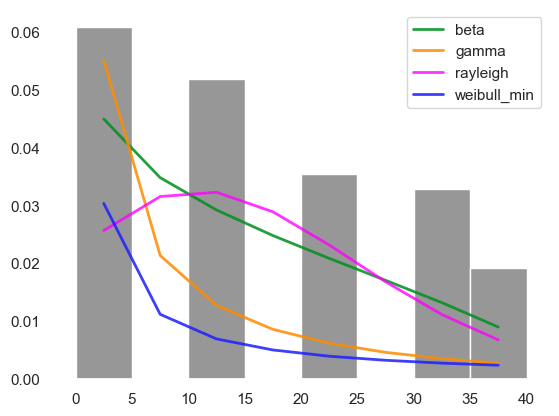

In [33]:
# Weibull for wind direction (0-45,46-90,91-120,..)

f = Fitter(wind_direction_np, distributions=['gamma','rayleigh','beta','weibull_min'],bins=8) # 
f.fit()
f.summary()

In [21]:
# Percentage for each direction
# alpha, x, beta
f.fitted_param['weibull_min']

(2.699465921618125, 310.5024141131159, 34.841542046827385)

## Not working

5.401780005087429
1.1504490293422658
[ 0.5144      1.01766087  1.52092174  2.02418261  2.52744348  3.03070435
  3.53396522  4.03722609  4.54048696  5.04374783  5.5470087   6.05026957
  6.55353043  7.0567913   7.56005217  8.06331304  8.56657391  9.06983478
  9.57309565 10.07635652 10.57961739 11.08287826 11.58613913 12.0894
 12.59266087 13.09592174 13.59918261 14.10244348 14.60570435 15.10896522
 15.61222609 16.11548696 16.61874783 17.1220087  17.62526957 18.12853043
 18.6317913  19.13505217 19.63831304 20.14157391 20.64483478 21.14809565
 21.65135652 22.15461739 22.65787826 23.16113913 23.6644    ]


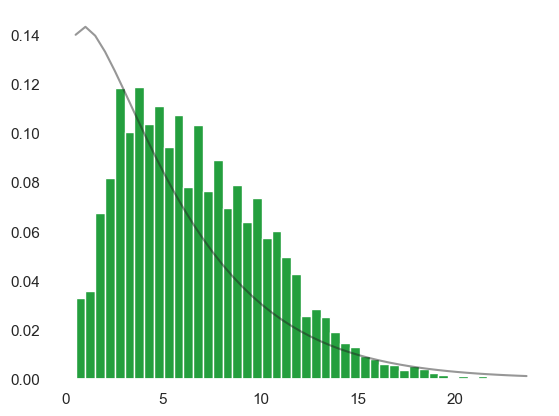

In [22]:
def weib(x,n,a):
    return (a / n) * (x / n)**(a - 1) * np.exp(-(x / n)**a)

(loc, scale) = stats.exponweib.fit_loc_scale(wind_np, 0.5, 0.5)
print(loc)
print(scale)

x = np.linspace(wind_np.min(), wind_np.max(), 47)
print(x)
plt.plot(x, weib(x, loc, scale))
plt.hist(wind_np,46, density=True)
plt.show()

In [23]:
c = 1.79
mean, var, skew, kurt = weibull_min.stats(c, moments='mvsk')

<BarContainer object of 46 artists>

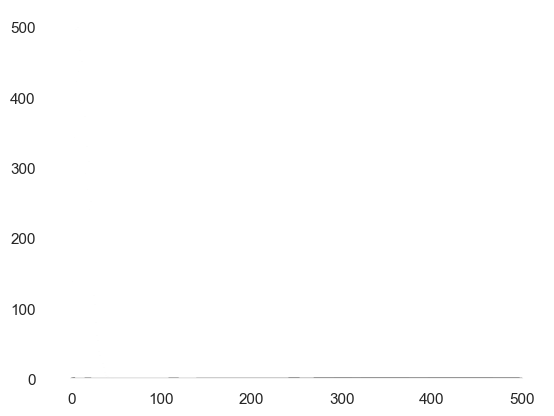

In [24]:
fig, ax = plt.subplots(1, 1)
x = np.linspace(min(wind_speed['Wind Speed']), max(wind_speed['Wind Speed']), 100)
ax.plot(wind_speed['Occ'], stats.exponweib.pdf(wind_speed['Occ'], *stats.exponweib.fit(wind_speed['Occ'], 1, 1, scale=1.5, loc=0)))
ax.bar(wind_speed['Wind Speed'],wind_speed['Occ'])

In [25]:
shape,loc,scale = stats.weibull_min.fit(wind_speed['Occ'], floc=0)
scale

153.94718595641683

In [26]:
vals = weibull_min.ppf([shape,loc,scale], c)
vals

array([1.17371414, 0.        ,        nan])

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


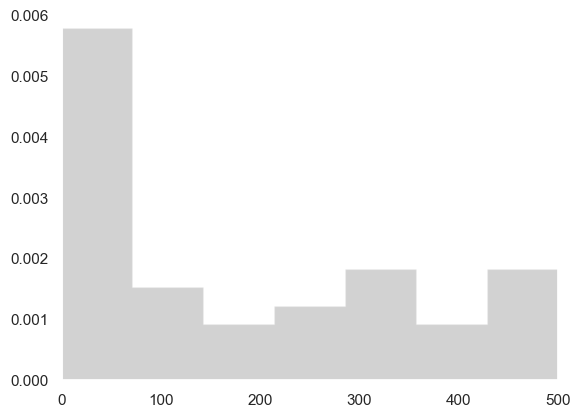

In [27]:
fig, ax = plt.subplots()

ax.hist(wind_speed['Occ'], density=True, bins='auto', histtype='stepfilled', alpha=0.2)

x = np.linspace(min(wind_speed['Occ']), max(wind_speed['Occ']), 100)


ax.set_xlim([x[0], x[-1]])
ax.legend(loc=loc, frameon=False)
plt.show()

### Weibull - not working

In [28]:
# Define the shape parameter for the Weibull distribution
shape_param = 1.99

# Calculate the Weibull distribution
wind_speed['weibull'] = weibull_min.pdf(wind_speed['Occ'], shape_param)

print(wind_speed)

    index  Wind Speed    Occ        weibull
0       1           1  139.0   0.000000e+00
1       2           2  150.0   0.000000e+00
2       3           3  283.0   0.000000e+00
3       4           4  343.0   0.000000e+00
4       5           5  497.0   0.000000e+00
5       6           6  423.0   0.000000e+00
6       7           7  500.0   0.000000e+00
7       8           8  437.0   0.000000e+00
8       9           9  467.0   0.000000e+00
9      10          10  396.0   0.000000e+00
10     11          11  452.0   0.000000e+00
11     12          12  328.0   0.000000e+00
12     13          13  434.0   0.000000e+00
13     14          14  322.0   0.000000e+00
14     15          15  374.0   0.000000e+00
15     16          16  292.0   0.000000e+00
16     17          17  331.0   0.000000e+00
17     18          18  269.0   0.000000e+00
18     19          19  310.0   0.000000e+00
19     20          20  241.0   0.000000e+00
20     21          21  253.0   0.000000e+00
21     22          22  208.0   0

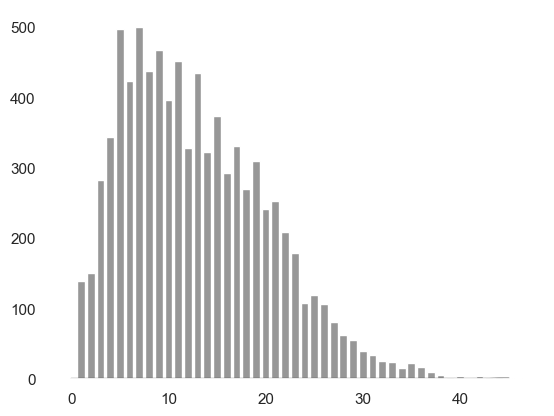

In [29]:
plt.figure()
plt.bar(wind_speed['Wind Speed'],wind_speed['Occ'])
plt.plot(wind_speed['weibull'])